## Домашнее задание 3 (10 баллов)

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [1]:
import pandas as pd

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [2]:
# your code here
data = pd.read_csv("https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv",
                   sep=",")
data

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad


### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [3]:
# your code here
if data.isna().sum().sum() == 0:
    print('no')
else:
    print('yes')

no


Количественные: duration, amount, age

Бинарные: telephone, foreign_worker, credit_risk

Порядковые: status, savings, employment_duration, installment_rate, number_credits, people_liable, job, credit_history, housing

Категориальные: purpose, personal_status_sex, property, other_installment_plans

### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [4]:
# your code here
data.groupby('purpose')['amount'].mean()

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64

### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [5]:
# your code here
print('Моложе 30: ', data[(data['age']<30)&(data['housing']=='rent')].shape[0]/data[data['age']<30].shape[0]*100, '%', sep='')
print('Старше 40: ', data[(data['age']>40)&(data['housing']=='rent')].shape[0]/data[data['age']>40].shape[0]*100, '%', sep='')

Моложе 30: 66.66666666666666%
Старше 40: 68.01470588235294%


### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [6]:
# your code here
data[(data['foreign_worker']=='yes')&(data['number_credits']!='1')&(data['number_credits']!='2-3')].count()[0]

1

### Задание 6 (1 балл)

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

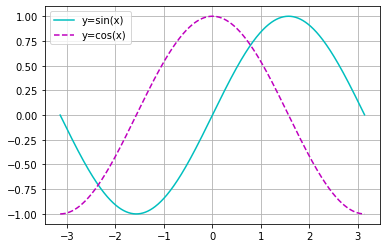

In [8]:
# your code here
x = np.arange(-np.pi,np.pi,0.01)
plt.plot(x, np.sin(x), color = 'c', label = 'y=sin(x)')
plt.plot(x, np.cos(x), color = 'm', linestyle = '--', label = 'y=cos(x)')
plt.legend()
plt.grid(True)
plt.show()

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

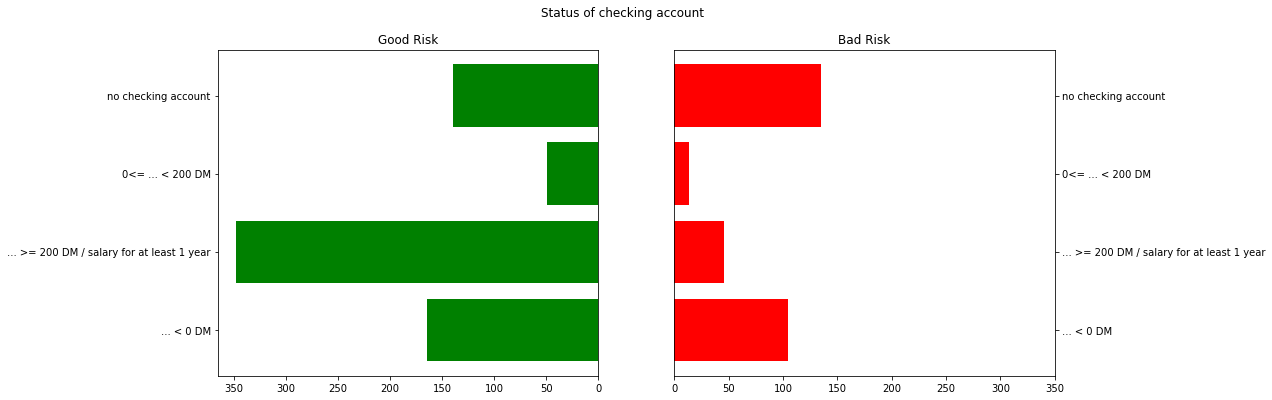

In [9]:
# your code here
nums = np.arange(0, 400, 50)
x = ['... < 0 DM', '... >= 200 DM / salary for at least 1 year', '0<= ... < 200 DM', 'no checking account']
yg = []
yb = []
for i in range(len(x)):
    yg.append(data[(data['status']==x[i])&(data['credit_risk']=='good')].count()[0])
    yb.append(data[(data['status']==x[i])&(data['credit_risk']=='bad')].count()[0])
fig, ax= plt.subplots(nrows=1, ncols=2, figsize = (15, 6))
plt.suptitle('Status of checking account')
ax[0].set_title('Good Risk')
ax[1].set_title('Bad Risk')
ax[0].barh(x, yg, align='center', color='green')
ax[1].barh(x, yb, align='center', color='red')
ax[1].yaxis.tick_right()
ax[0].set_xticks(nums)
ax[1].set_xticks(nums)
ax[0].invert_xaxis() 

### Задание 8  (0.5 балла)

In [10]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

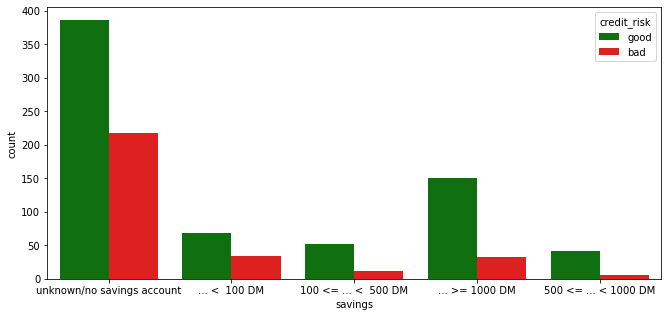

In [11]:
# your code here
plt.figure(figsize=(11, 5))
sns.countplot(x='savings', hue='credit_risk', data=data, palette=['g', 'r'])
plt.show()

In [12]:
# Matplotlib показался понятнее, хоть seaborn и компактнее

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

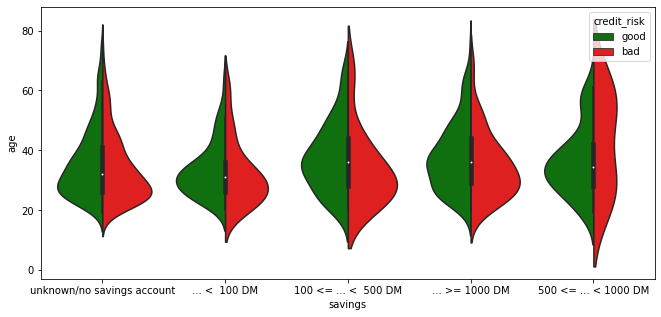

In [13]:
# your code here
plt.figure(figsize=(11, 5))
sns.violinplot(x='savings', y='age', hue='credit_risk', data=data, palette=['g', 'r'], split=True)
plt.show()

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

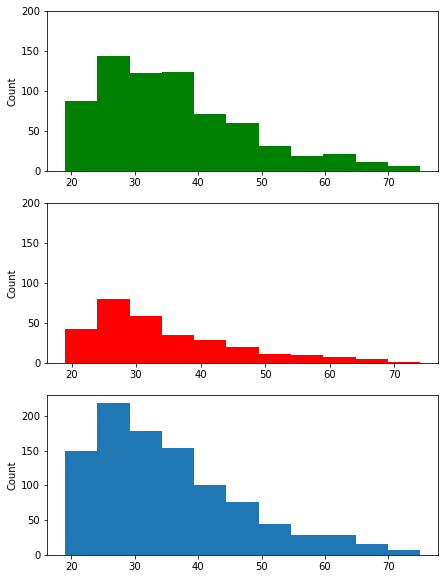

In [14]:
# your code here
fig, ax= plt.subplots(nrows=3, ncols=1, figsize = (7, 10))
datag=data[data['credit_risk']=='good']
datab=data[data['credit_risk']=='bad']
ax[0].hist(datag['age'], bins=11, color='g')
ax[0].set_yticks(np.arange(0, 250, 50))
ax[0].set_ylabel("Count")
ax[1].hist(datab['age'], bins=11, color='r')
ax[1].set_yticks(np.arange(0, 250, 50))
ax[1].set_ylabel("Count")
ax[2].hist(data['age'], bins=11)
ax[2].set_yticks(np.arange(0, 250, 50))
ax[2].set_ylabel("Count")
plt.show()

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

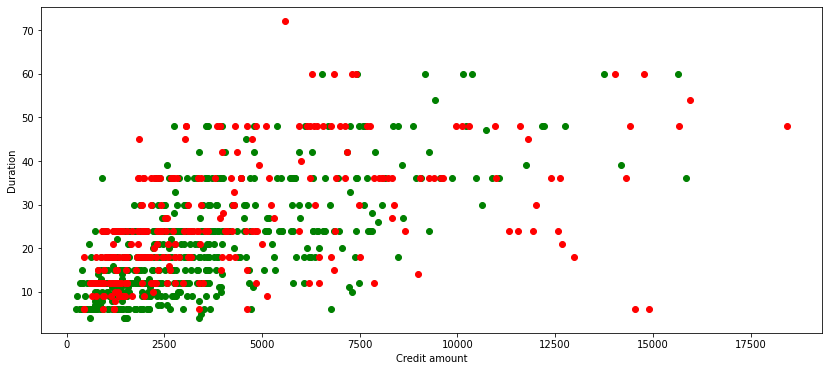

In [15]:
# your code here
fig, ax= plt.subplots(figsize = (14, 6))
datag=data[data['credit_risk']=='good']
datab=data[data['credit_risk']=='bad']
ax.scatter(datag['amount'], datag['duration'], color = 'g')
ax.scatter(datab['amount'], datab['duration'], color = 'r')
ax.set_xlabel("Credit amount")
ax.set_ylabel("Duration")
plt.show()

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

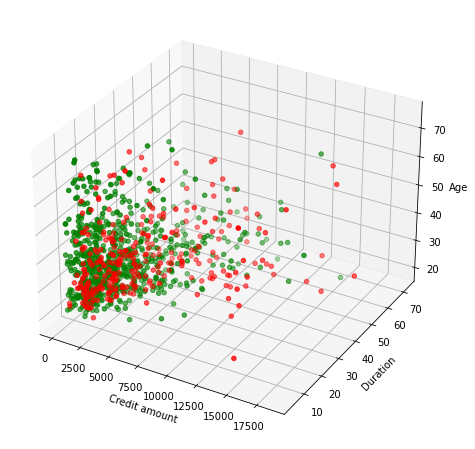

In [16]:
# your code here
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
datag=data[data['credit_risk']=='good']
datab=data[data['credit_risk']=='bad']
ax.scatter(datab['amount'], datab['duration'], datab['age'], color = 'r')
ax.scatter(datag['amount'], datag['duration'], datag['age'], color = 'g')
ax.set_xlabel("Credit amount")
ax.set_ylabel("Duration")
ax.set_zlabel("Age")
plt.show()

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [17]:
data = pd.read_csv("https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv",
                   sep=",")
data.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good


In [18]:
# your code here
def magic(data):
    new = data.copy()
    new['telephone'] = new['telephone'].replace('no', 0).replace('yes (under customer name)', 1)
    new['credit_risk'] = new['credit_risk'].replace('good', 1).replace('bad', 0)
    new['foreign_worker'] = new['foreign_worker'].replace('no', 0).replace('yes', 1)
    new['status'] = new['status'].replace('no checking account', 0).replace('... < 0 DM', 1).replace('0<= ... < 200 DM', 2).replace('... >= 200 DM / salary for at least 1 year', 3)
    new['savings'] = new['savings'].replace('unknown/no savings account', 0).replace('... <  100 DM', 1).replace('100 <= ... <  500 DM', 2).replace('500 <= ... < 1000 DM', 3).replace('... >= 1000 DM', 4)
    new['employment_duration'] = new['employment_duration'].replace('unemployed', 0).replace('< 1 yr', 1).replace('1 <= ... < 4 yrs', 2).replace('4 <= ... < 7 yrs', 3).replace('>= 7 yrs', 4)
    new['installment_rate'] = new['installment_rate'].replace('< 20', 0).replace('20 <= ... < 25', 1).replace('25 <= ... < 35', 2).replace('>= 35', 3)
    new['number_credits'] = new['number_credits'].replace('1', 0).replace('2-3', 1).replace('4-5', 2).replace('>= 6', 3)
    new['people_liable'] = new['people_liable'].replace('0 to 2', 0).replace('3 or more', 1)
    new['job'] = new['job'].replace('unemployed/unskilled - non-resident', 0).replace('unskilled - resident', 1).replace('skilled employee/official', 2).replace('manager/self-empl./highly qualif. employee', 3)
    new.drop('personal_status_sex', axis='columns', inplace=True)
    new.drop('purpose', axis='columns', inplace=True)
    new.drop('property', axis='columns', inplace=True)
    new['present_residence'] = new['present_residence'].replace('< 1 yr', 0).replace('1 <= ... < 4 yrs', 1).replace('4 <= ... < 7 yrs', 2).replace('>= 7 yrs', 3)
    new['guarantor'] = new['other_debtors'].apply(lambda x: 1 if x=='guarantor' else 0)
    new['co-applicant'] = new['other_debtors'].apply(lambda x: 1 if x=='co-applicant' else 0)
    new.drop('other_debtors', axis='columns', inplace=True)
    new['bank_plan'] = new['other_installment_plans'].apply(lambda x: 1 if x=='bank' else 0)
    new['stores_plan'] = new['other_installment_plans'].apply(lambda x: 1 if x=='stores' else 0)
    new.drop('other_installment_plans', axis='columns', inplace=True)
    new['housing'] = new['housing'].replace('for free', 0).replace('own', 1).replace('rent', 2)
    new['credit_history'] = new['credit_history'].replace('no credits taken/all credits paid back duly' , 0).replace('all credits at this bank paid back duly' , 1).replace('existing credits paid back duly till now' , 2).replace('delay in paying off in the past', 3).replace('critical account/other credits elsewhere', 4)
    return new
data = magic(data)
data

,status,duration,credit_history,amount,savings,employment_duration,installment_rate,present_residence,age,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk,guarantor,co-applicant,bank_plan,stores_plan
0,0,18,1,1049,0,1,0,3,21,0,0,2,0,0,0,1,0,0,0,0
1,0,9,1,2799,0,2,2,1,36,0,1,2,1,0,0,1,0,0,0,0
2,1,12,0,841,1,3,2,3,23,0,0,1,0,0,0,1,0,0,0,0
3,0,12,1,2122,0,2,1,1,39,0,1,1,1,0,1,1,0,0,0,0
4,0,12,1,2171,0,2,0,3,38,2,1,1,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,24,0,1987,0,2,2,3,21,0,0,1,1,0,0,0,0,0,0,0
996,0,24,0,2303,0,4,0,0,45,2,0,2,0,0,0,0,0,1,0,0
997,3,21,1,12680,4,4,0,3,30,1,0,3,0,1,0,0,0,0,0,0
998,1,12,0,6468,4,0,2,0,52,2,0,3,0,1,0,0,0,0,0,0


### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [19]:
def predict(Xtest: np.array) -> np.array:
    # your code here
    x = Xtest.reshape(Xtest.shape[0], -1)
    y = []
    for i in range(len(x)):
        temp=10*x[i][0]-1*x[i][1]-3*x[i][2]-x[i][3]//1000+50*x[i][4]+10*x[i][5]+60*x[i][6]+x[i][7]-((70-x[i][9])**2)//1000+10*x[i][10]-10*x[i][11]+10*x[i][12]+10*x[i][13]+100*x[i][14]
        if temp > 0:
            temp = 1
        else:
            temp = 0
        y.append(temp)
    return np.array(y)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = data.drop('credit_risk', 1).values
y = data['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
# Используйте X_train и y_train на ваше усмотрение
# your code here
accuracy_score(y_test, predict(X_test))

0.752